Skin cancer is the most common human malignancy, is primarily diagnosed visually, beginning with an initial clinical screening and followed potentially by dermoscopic analysis, a biopsy and histopathological examination. Automated classification of skin lesions using images is a challenging task owing to the fine-grained variability in the appearance of skin lesions.

This the HAM10000 ("Human Against Machine with 10000 training images") dataset.It consists of 10015 dermatoscopicimages which are released as a training set for academic machine learning purposes and are publiclyavailable through the ISIC archive. This benchmark dataset can be used for machine learning and for comparisons with human experts.

It has 7 different classes of skin cancer which are listed below :
1. Melanocytic nevi
2. Melanoma
3. Benign keratosis-like lesions
4. Basal cell carcinoma
5. Actinic keratoses
6. Vascular lesions
7. Dermatofibroma

In this kernel I will try to detect 7 different classes of skin cancer using Convolution Neural Network with keras tensorflow in backend and then analyse the result to see how the model can be useful in practical scenario.
We will move step by step process to classify 7 classes of cancer.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import random
%matplotlib inline

In [2]:
base_skin_dir = r"D:\dataset"
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv')) 

In [3]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
print(f'shape of our dataset is {skin_df.shape}')

shape of our dataset is (10015, 7)


In [5]:
image_id_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [6]:
lesion_type_dict = {
    'nv': 'Melanocytic_nevi',
    'mel': 'melanoma',
    'bkl': 'Benign_keratosis-like_lesions',
    'bcc': 'Basal_cell_carcinoma',
    'akiec': 'Actinic_keratoses',
    'vasc': 'Vascular_lesions',
    'df': 'Dermatofibroma'
}

lesion_danger = {
    'nv': 0, # 0 for benign
    'mel': 1, # 1 for malignant
    'bkl': 0, # 0 for benign
    'bcc': 1, # 1 for malignant
    'akiec': 1, # 1 for malignant
    'vasc': 0,  # 0 for benign
    'df': 0   # 0 for benign
}

In [7]:
skin_df["path"] = skin_df["image_id"].map(image_id_path_dict.get) # map image_id to the path of that image
skin_df["cell_type"] = skin_df["dx"].map(lesion_type_dict.get) # map dx to type of lesion

In [8]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0027419.jpg,Benign_keratosis-like_lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0025030.jpg,Benign_keratosis-like_lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0026769.jpg,Benign_keratosis-like_lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0025661.jpg,Benign_keratosis-like_lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,D:\dataset\orig\ISIC_0031633.jpg,Benign_keratosis-like_lesions


In [9]:
skin_df["Malignant"] = skin_df["dx"].map(lesion_danger.get)

In [10]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,Malignant
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0027419.jpg,Benign_keratosis-like_lesions,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0025030.jpg,Benign_keratosis-like_lesions,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0026769.jpg,Benign_keratosis-like_lesions,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0025661.jpg,Benign_keratosis-like_lesions,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,D:\dataset\orig\ISIC_0031633.jpg,Benign_keratosis-like_lesions,0


In [11]:
skin_df["cell_type_idx"] = pd.Categorical(skin_df["cell_type"]).codes # give each cell type a category id

In [12]:
skin_df.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,Malignant,cell_type_idx
9847,HAM_0002307,ISIC_0032154,akiec,histo,75.0,male,chest,D:\dataset\orig\ISIC_0032154.jpg,Actinic_keratoses,1,0
3995,HAM_0003071,ISIC_0026000,nv,follow_up,80.0,male,abdomen,D:\dataset\orig\ISIC_0026000.jpg,Melanocytic_nevi,0,4
2253,HAM_0005909,ISIC_0026045,mel,histo,65.0,male,upper extremity,D:\dataset\orig\ISIC_0026045.jpg,melanoma,1,6
901,HAM_0006009,ISIC_0027279,bkl,consensus,65.0,male,face,D:\dataset\orig\ISIC_0027279.jpg,Benign_keratosis-like_lesions,0,2
4890,HAM_0003831,ISIC_0026724,nv,follow_up,40.0,male,abdomen,D:\dataset\orig\ISIC_0026724.jpg,Melanocytic_nevi,0,4


In [13]:
# create visualization for target variable distribution
def barplot(df, xlabel, ylabel, title,p):
    plt.figure(figsize = (7,7))
    ax = sns.countplot(x = xlabel, data = df, palette =p )
    plt.title(title, fontsize = 16)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    total = len(df.Malignant)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y), size = 16)
    plt.show()

0    8061
1    1954
Name: Malignant, dtype: int64


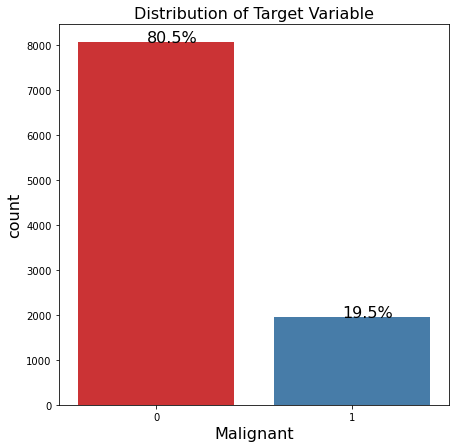

In [14]:
print(skin_df.Malignant.value_counts())
barplot(skin_df, 'Malignant', 'count', 'Distribution of Target Variable',"Set1")

In this step we check for Missing values and datatype of each field

In [15]:
skin_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
Malignant         0
cell_type_idx     0
dtype: int64

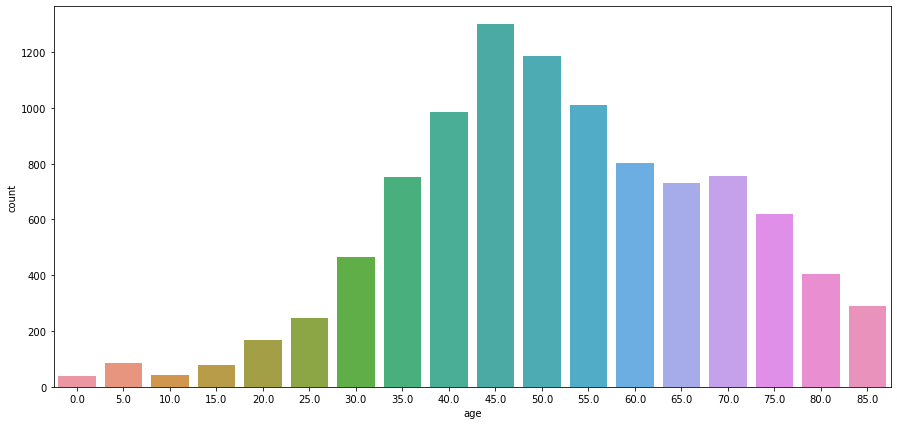

In [16]:
plt.figure(figsize = (15,7))
sns.countplot(x='age', data=skin_df)
plt.show()

In [17]:
skin_df['age'].fillna(skin_df['age'].median(),inplace=True)

Now, lets check the presence of null values again

In [18]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
Malignant        0
cell_type_idx    0
dtype: int64

In [19]:
print(skin_df.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
Malignant          int64
cell_type_idx       int8
dtype: object


In [20]:
skin_df['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

male       5406
female     4552
unknown      57
Name: sex, dtype: int64


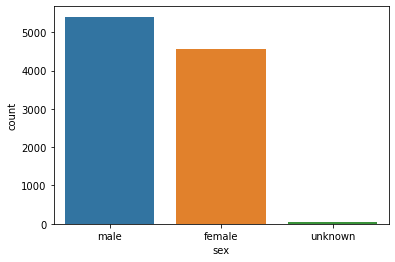

In [21]:
print(skin_df['sex'].value_counts())
sns.countplot(x='sex', data=skin_df)
plt.show()

In [22]:
skin_df.loc[skin_df.sex == "unknown", "sex"] = "male"

In [23]:
skin_df['sex'].unique()

array(['male', 'female'], dtype=object)

#### Diagnosis Distribution

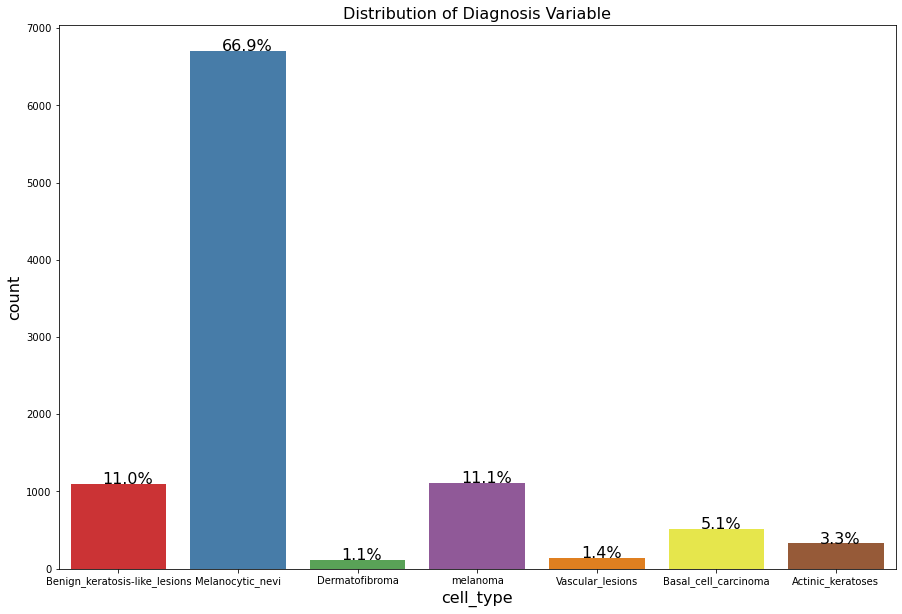

In [24]:
def barplot(df, xlabel, ylabel, title,p):
    plt.figure(figsize = (15,10))
    ax = sns.countplot(x = xlabel, data = df, palette =p )
    plt.title(title, fontsize = 16)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 3
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y), size = 16)
    plt.show()
    
barplot(skin_df, 'cell_type', 'count', 'Distribution of Diagnosis Variable',"Set1")

##### Observations
Its seems from the above plot that in this dataset cell type Melanecytic nevi has very large number of instances in comparison to other cell types

#### Gender Distribution

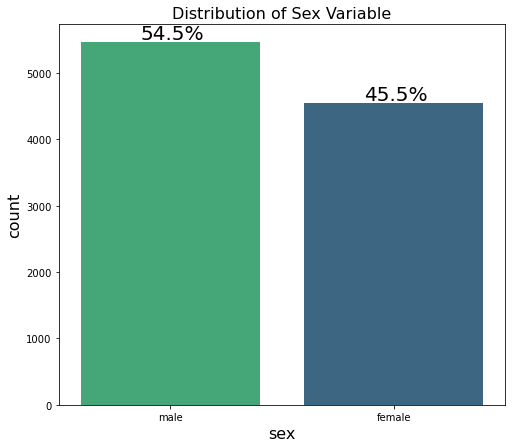

In [25]:
def barplot(df, xlabel, ylabel, title,p):
    plt.figure(figsize = (8,7))
    ax = sns.countplot(x = xlabel, data = df, palette =p )
    plt.title(title, fontsize = 16)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 3
        y = p.get_y() + p.get_height()  /0.99
        ax.annotate(percentage, (x, y), size = 20)
    plt.show()
    
barplot(skin_df, 'sex', 'count', 'Distribution of Sex Variable',"viridis_r")

In [26]:
# display difference in gender distribution of melanoma vs. non-melanoma patients
def twoplot(data1, data2, xlabel, ylabel, title1, title2 ):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
    a = sns.countplot(x=xlabel, data=data1, ax=ax1 , palette = 'Set1')
    b = sns.countplot(x=xlabel, data=data2, ax=ax2 , palette = 'Set1')
    ax1.set_title(title1, fontsize=16)
    ax2.set_title(title2, fontsize=16)
    ax1.set_xlabel(xlabel, size=16)
    ax1.set_ylabel(ylabel, size=16)
    ax2.set_xlabel(xlabel, size=16)
    ax2.set_ylabel(ylabel, size=16)
#     for p in a.patches:
#      a.annotate(format(p.get_height(), ','), 
#            (p.get_x() + p.get_width() / 2., 
#             p.get_height()), ha = 'center', va = 'center', 
#            xytext = (0, 4), textcoords = 'offset points')
    
    for p in a.patches:
     a.annotate('{:.1f}%'.format(100 * p.get_height()/len(data1)), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')   
    
    for p in b.patches:
     b.annotate('{:.1f}%'.format(100 * p.get_height()/len(data2)),  
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')

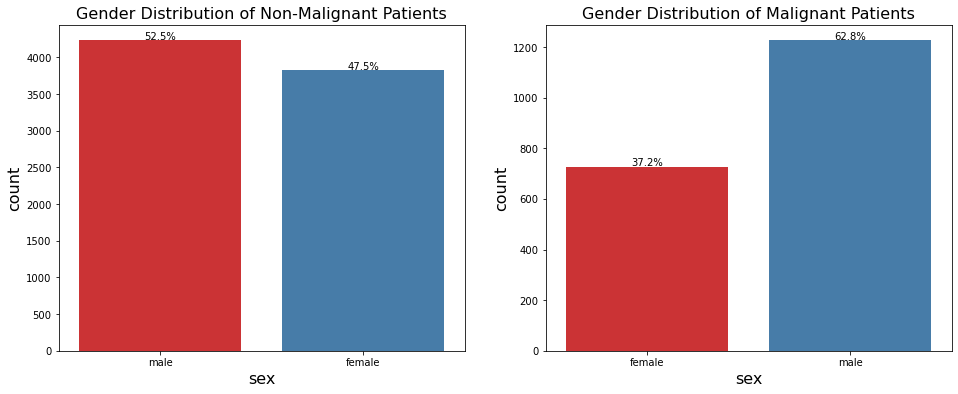

In [27]:
twoplot(skin_df[skin_df.Malignant == 0], skin_df[skin_df.Malignant == 1], 'sex', 'count',
        "Gender Distribution of Non-Malignant Patients", "Gender Distribution of Malignant Patients")

In [28]:
z=skin_df.groupby(['cell_type','sex'])['Malignant'].count().to_frame().reset_index()
z.style.background_gradient(cmap='Reds')  

,cell_type,sex,Malignant
0,Actinic_keratoses,female,106
1,Actinic_keratoses,male,221
2,Basal_cell_carcinoma,female,197
3,Basal_cell_carcinoma,male,317
4,Benign_keratosis-like_lesions,female,463
5,Benign_keratosis-like_lesions,male,636
6,Dermatofibroma,female,52
7,Dermatofibroma,male,63
8,Melanocytic_nevi,female,3237
9,Melanocytic_nevi,male,3468


##### Observations
there is a 60/40 split in the Malignant population for males and females due to the fact that under 50, melanoma occurs more frequently in women, while above 50, occurs more often in men and increasingly so moving into 80.
https://www.cancer.net/cancer-types/melanoma/statistics



#### Age Distribution

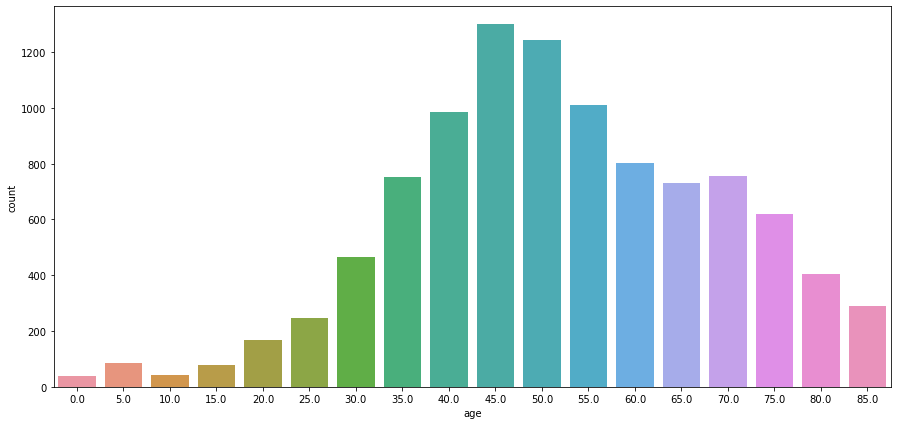

In [29]:
plt.figure(figsize = (15,7))
sns.countplot(x='age', data=skin_df)
plt.show()

Text(0, 0.5, 'Count')

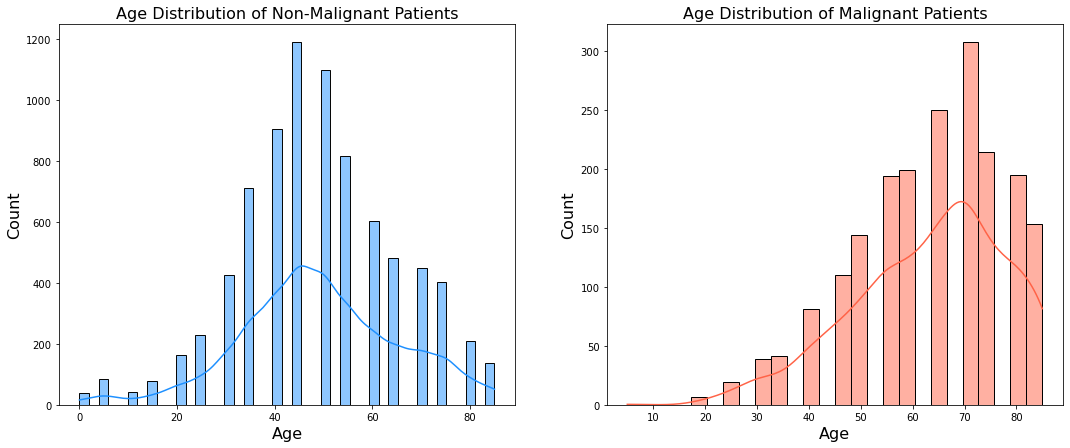

In [30]:
# display distribution of age for non-melanoma vs. melanoma patients
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
sns.histplot(x='age', data=skin_df[skin_df.Malignant == 0], kde=True, color='dodgerblue', ax=ax1)
sns.histplot(x='age', data=skin_df[skin_df.Malignant == 1], kde=True, color='tomato', ax=ax2)
ax1.set_title("Age Distribution of Non-Malignant Patients", fontsize=16)
ax2.set_title("Age Distribution of Malignant Patients", fontsize=16)
ax1.set_xlabel('Age', size=16)
ax1.set_ylabel('Count', size=16)
ax2.set_xlabel('Age', size=16)
ax2.set_ylabel('Count', size=16)

##### Observations
It seems that there are larger instances of patients having age from 30 to 60


### Site Distribution

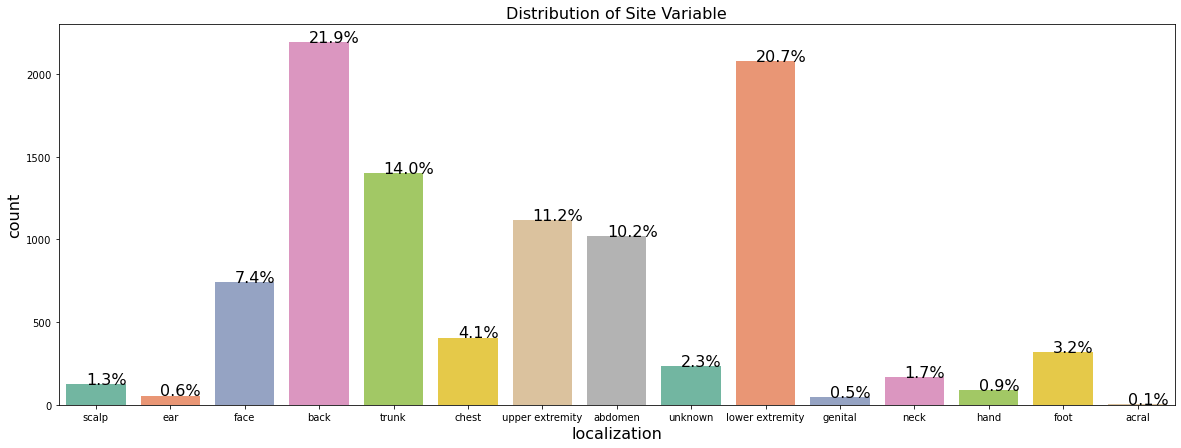

In [31]:
def barplot(df, xlabel, ylabel, title,p):
    plt.figure(figsize = (20,7))
    ax = sns.countplot(x = xlabel, data = df, palette =p )
    plt.title(title, fontsize = 16)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 3
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y), size = 16)
    plt.show()
    
barplot(skin_df, 'localization', 'count', 'Distribution of Site Variable',"Set2")

##### Observations
It seems back , lower extremity,trunk and upper extremity are heavily compromised regions of skin cancer



### Dx_type Distribution

Plotting of Technical Validation field (ground truth) which is dx_type to see the distribution of its 4 categories which are listed below :
1. Histopathology(Histo): Histopathologic diagnoses of excised lesions have been performed by specialized dermatopathologists.
2. Confocal: Reflectance confocal microscopy is an in-vivo imaging technique with a resolution at near-cellular level , and some facial benign with a grey-world assumption of all training-set images in Lab-color space before and after manual histogram changes.
3. Follow-up: If nevi monitored by digital dermatoscopy did not show any changes during 3 follow-up visits or 1.5 years biologists accepted this as evidence of biologic benignity. Only nevi, but no other benign diagnoses were labeled with this type of ground-truth because dermatologists usually do not monitor dermatofibromas, seborrheic keratoses, or vascular lesions.
4. Consensus: For typical benign cases without histopathology or followup biologists provide an expert-consensus rating of authors PT and HK. They applied the consensus label only if both authors independently gave the same unequivocal benign diagnosis. Lesions with this type of groundtruth were usually photographed for educational reasons and did not need further follow-up or biopsy for confirmation.

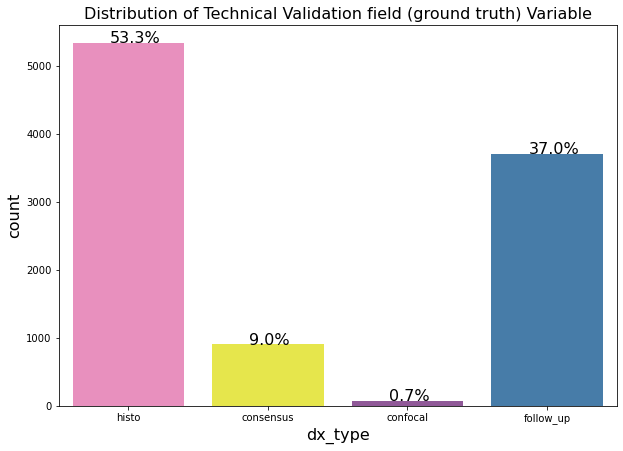

In [32]:

def barplot(df, xlabel, ylabel, title,p):
    plt.figure(figsize = (10,7))
    ax = sns.countplot(x = xlabel, data = df, palette =p )
    plt.title(title, fontsize = 16)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 3
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y), size = 16)
    plt.show()
    
barplot(skin_df, 'dx_type', 'count', 'Distribution of Technical Validation field (ground truth) Variable',"Set1_r")

In [33]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,Malignant,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0027419.jpg,Benign_keratosis-like_lesions,0,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0025030.jpg,Benign_keratosis-like_lesions,0,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0026769.jpg,Benign_keratosis-like_lesions,0,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,D:\dataset\orig\ISIC_0025661.jpg,Benign_keratosis-like_lesions,0,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,D:\dataset\orig\ISIC_0031633.jpg,Benign_keratosis-like_lesions,0,2
...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,D:\dataset\orig\ISIC_0033084.jpg,Actinic_keratoses,1,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,D:\dataset\orig\ISIC_0033550.jpg,Actinic_keratoses,1,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,D:\dataset\orig\ISIC_0033536.jpg,Actinic_keratoses,1,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,D:\dataset\orig\ISIC_0032854.jpg,Actinic_keratoses,1,0


In [34]:
skin_df.to_csv('skin_df.csv')